In [18]:
from google.colab import drive
drive.mount('/content/gdrive/')
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [19]:
image_size = [224, 224]
train_path='/content/gdrive/MyDrive/Cotton disease/train/'
test_path='/content/gdrive/MyDrive/Cotton disease/test/'

In [20]:
incep_v3 = InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [21]:
for layer in incep_v3.layers:
    layer.trainable = False

In [22]:
folders = glob('/content/gdrive/MyDrive/Cotton disease/train/*')

In [23]:
folders

['/content/gdrive/MyDrive/Cotton disease/train/fresh cotton plant',
 '/content/gdrive/MyDrive/Cotton disease/train/fresh cotton leaf',
 '/content/gdrive/MyDrive/Cotton disease/train/diseased cotton plant',
 '/content/gdrive/MyDrive/Cotton disease/train/diseased cotton leaf']

In [24]:
x = Flatten()(incep_v3.output)

In [25]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [26]:
model = Model(inputs = incep_v3.input, outputs = prediction)

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [28]:
model.compile( loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_data_gen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
testing_set = test_data_gen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [33]:
# training|fitting the model
r = model.fit_generator(
    training_set, 
    validation_data=testing_set, 
    epochs=20, 
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set) 
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
61/61 [==============================] - 520s 8s/step - loss: 1.6612 - accuracy: 0.7642 - val_loss: 0.1088 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 232s 4s/step - loss: 0.8050 - accuracy: 0.8708 - val_loss: 0.2140 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 233s 4s/step - loss: 0.6055 - accuracy: 0.9047 - val_loss: 0.1879 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 233s 4s/step - loss: 0.6048 - accuracy: 0.9088 - val_loss: 2.0775e-04 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 232s 4s/step - loss: 0.4995 - accuracy: 0.9288 - val_loss: 4.0040e-05 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 233s 4s/step - loss: 0.4000 - accuracy: 0.9457 - val_loss: 0.0620 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 233s 4s/step - loss: 0.4028 - accuracy: 0.9339 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch

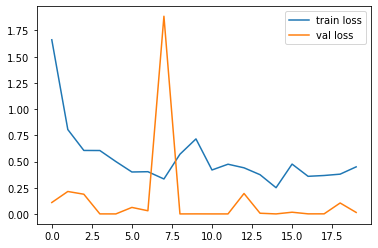

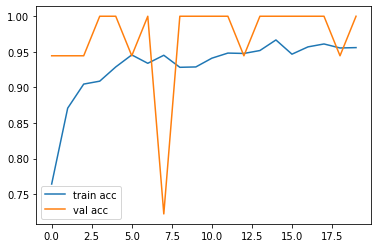

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
pred = effnet_model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

NameError: ignored

In [ ]:
print(classification_report(y_test_new,pred))

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True, cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold', fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)
plt.show()